In [97]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [98]:
#Read the data from CSV file 
bikesharing = pd.read_csv(r"C:\learning\bikeSharing\data\day.csv")
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [99]:
# Drop unnecessary columns
bikesharing = bikesharing.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)
bikesharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [100]:
# Convert 'season', 'weathersit', 'weekday', and 'mnth' to categorical variables
bikesharing['season'] = bikesharing['season'].map({1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'})
bikesharing['weathersit'] = bikesharing['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light snow/rain', 4: 'heavy rain/snow'})
bikesharing['weekday'] = bikesharing['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
bikesharing['mnth'] = bikesharing['mnth'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

In [101]:
# Convert categorical variables to dummy variables
bikesharing = pd.get_dummies(bikesharing, columns=['season', 'weathersit', 'weekday', 'mnth'], drop_first=True)

# Converting dummy variables from True/False to 0/1
bikesharing = bikesharing.astype(int)

# Display the first few rows to confirm the changes
bikesharing.head()
bikesharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter',
       'weathersit_light snow/rain', 'weathersit_mist', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'mnth_August', 'mnth_December',
       'mnth_February', 'mnth_January', 'mnth_July', 'mnth_June', 'mnth_March',
       'mnth_May', 'mnth_November', 'mnth_October', 'mnth_September'],
      dtype='object')

In [102]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the data
bikesharing = pd.DataFrame(scaler.fit_transform(bikesharing), columns=bikesharing.columns)

# Display the first few rows of the scaled dataset to confirm changes
bikesharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September
0,0.0,0.0,0.0,0.363636,0.384615,0.824742,0.272727,0.110792,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.363636,0.358974,0.711340,0.454545,0.089623,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.181818,0.153846,0.443299,0.454545,0.152669,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.181818,0.179487,0.608247,0.272727,0.177174,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.212121,0.205128,0.443299,0.333333,0.181546,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


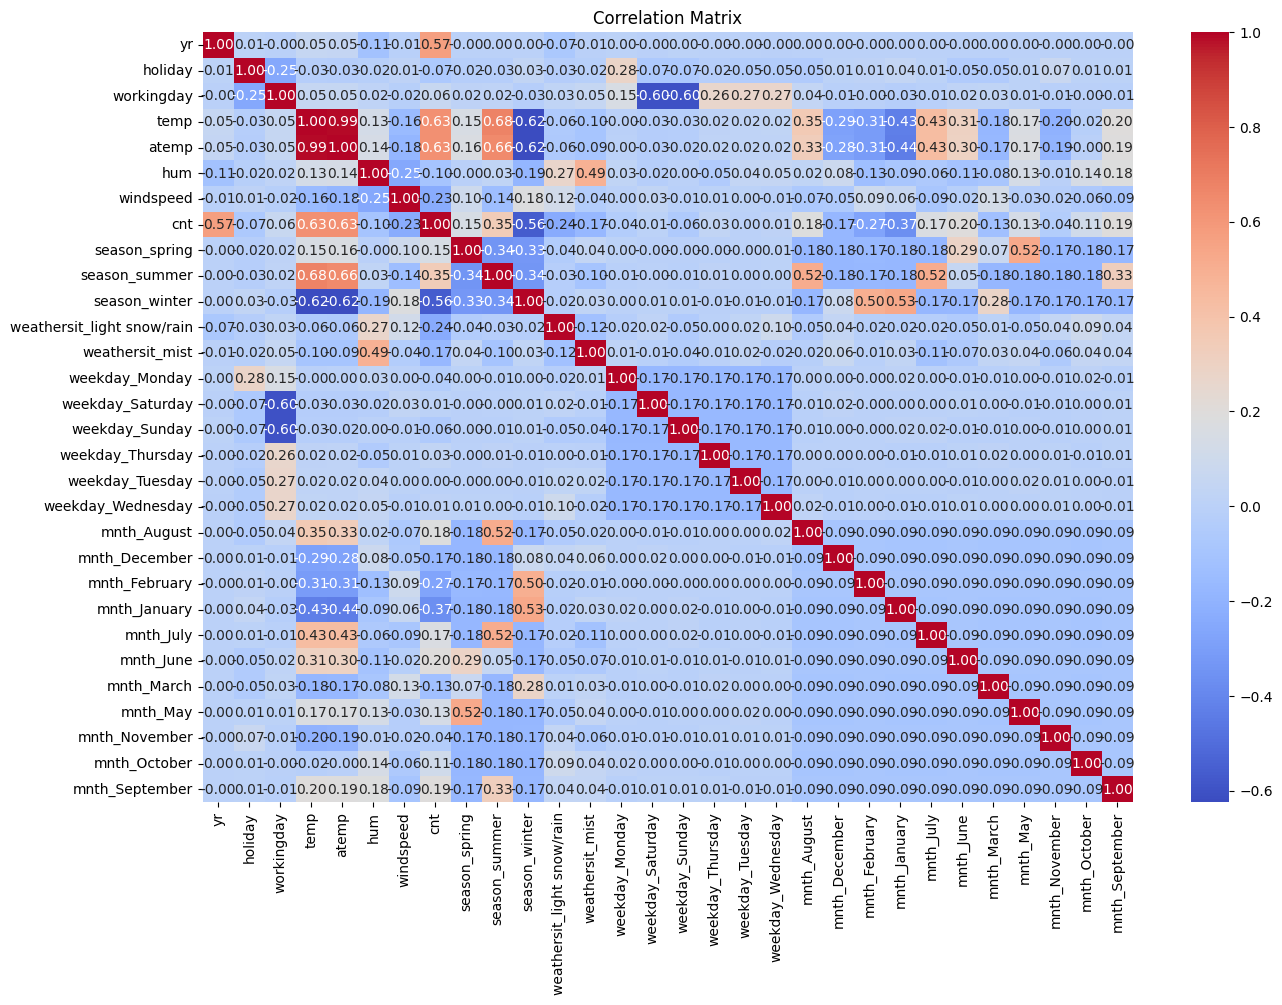

In [103]:
# Correlation matrix
plt.figure(figsize=(15, 10))
correlation_matrix = bikesharing.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

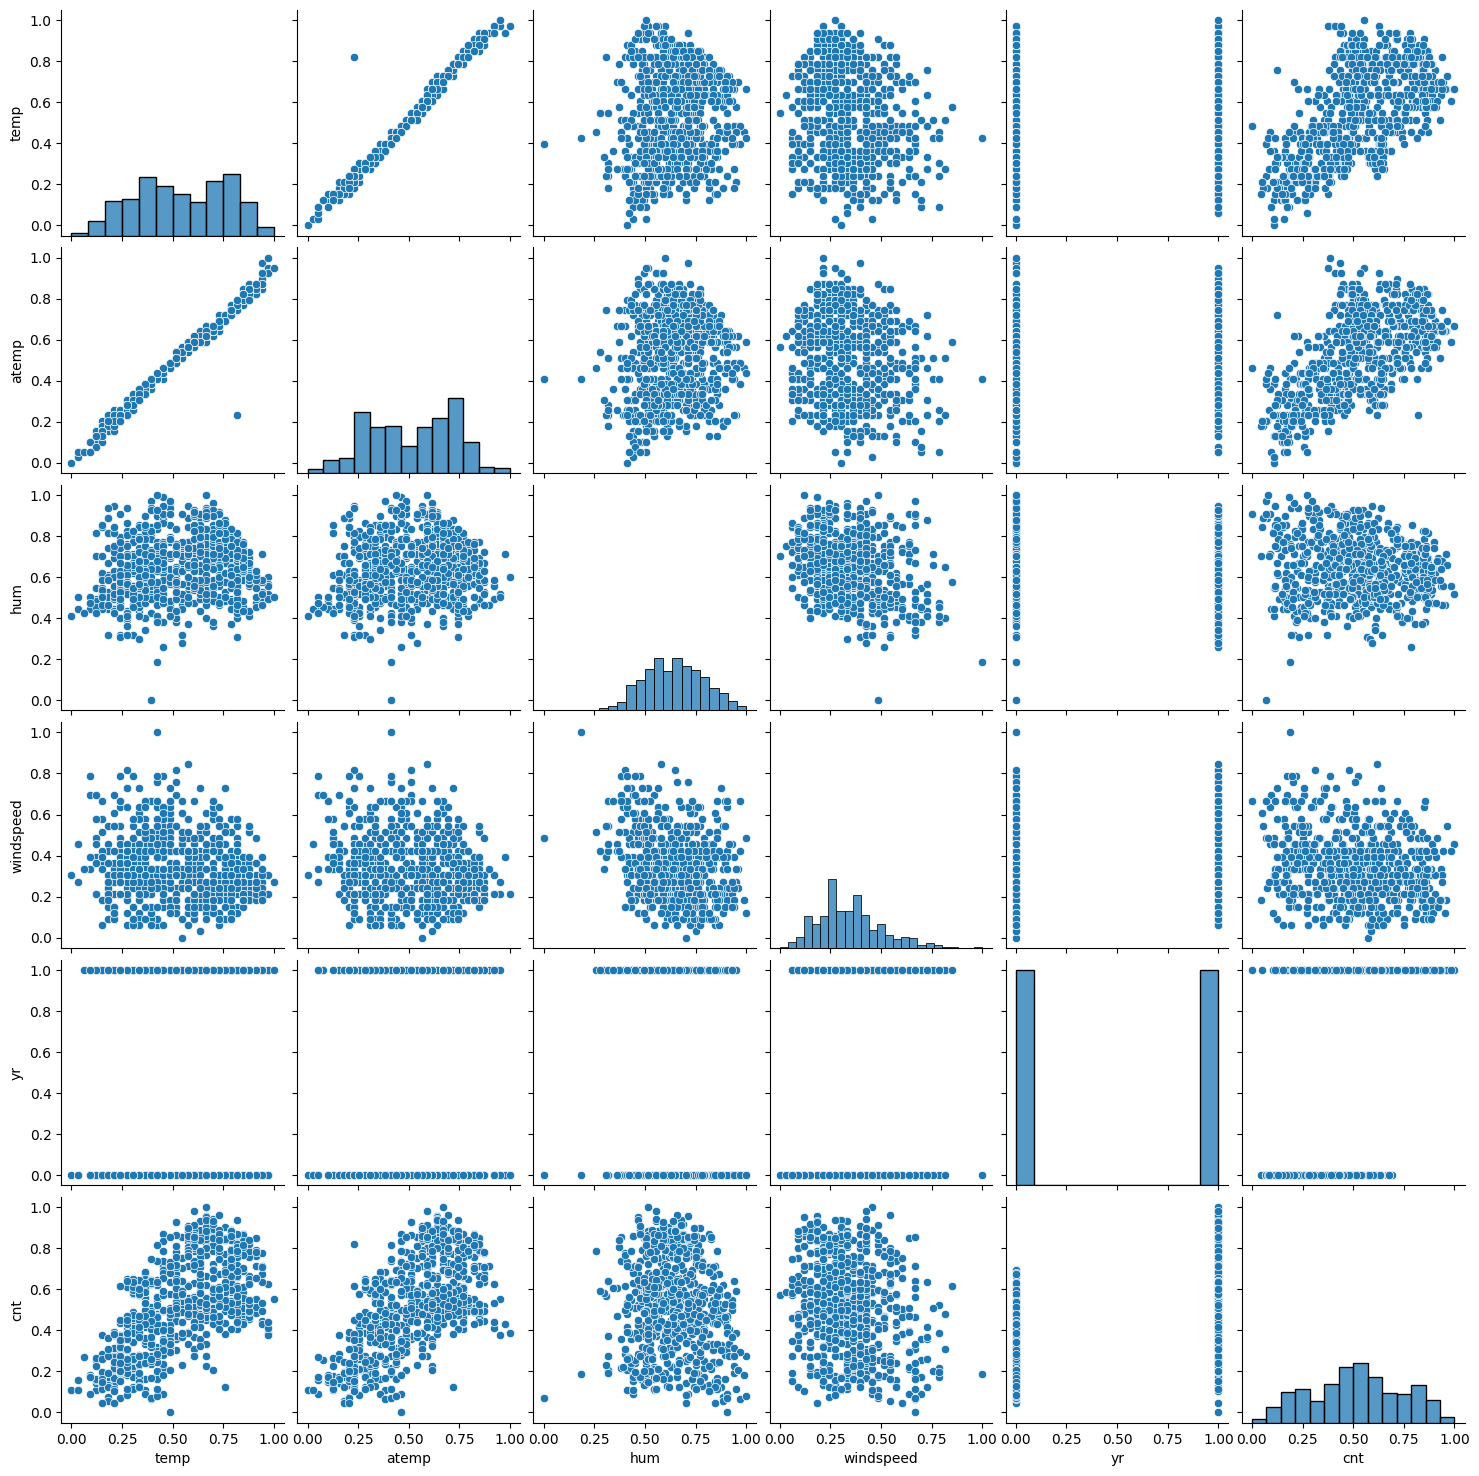

In [104]:
# Pairplot to visualize relationships between some key variables and 'cnt'
sns.pairplot(bikesharing[['temp', 'atemp', 'hum', 'windspeed', 'yr', 'cnt']])
plt.show()

In [105]:
# Splitting the data into features and target
X = bikesharing.drop('cnt', axis=1)
y = bikesharing['cnt']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=100
)

# Using stats model to get an insight on various statistical values (p-value, R2 etc..)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.45
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          1.41e-180
Time:                        15:39:08   Log-Likelihood:                 527.18
No. Observations:                 511   AIC:                            -996.4
Df Residuals:                     482   BIC:                            -873.5
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.3360      0.037      9.094      0.000       0.263       0.409
yr                             0.2327      0.008     28.766      0.000       0.217       0.249
holiday                        0.0351      0.025      1.431      0.153      -0.013       0.083
workingday                     0.1196      0.012      9.576      0.000       0.095       0.144
temp                           0.3395      0.133      2.548      0.011       0.078       0.601
atemp                          0.1063      0.133      0.801      0.424      -0.155       0.367
hum                           -0.1530      0.039     -3.952      0.000      -0.229      -0.077
windspeed                     -0.1906      0.028     -6.839      0.000      -0.245      -0.136
season_spring                 -0.0643      0.030     -2.154      0.032      -0.123      -0.006
season_summer                 -0.1040      0.028     -3.714      0.000      -0.159      -0.049
season_winter                 -0.1523      0.026     -5.848      0.000      -0.203      -0.101
weathersit_light snow/rain    -0.2562      0.027     -9.651      0.000      -0.308      -0.204
weathersit_mist               -0.0600      0.010     -5.744      0.000      -0.081      -0.040
weekday_Monday                -0.0226      0.015     -1.462      0.144      -0.053       0.008
weekday_Saturday               0.1179      0.014      8.538      0.000       0.091       0.145
weekday_Sunday                 0.0633      0.014      4.473      0.000       0.035       0.091
weekday_Thursday              -0.0097      0.016     -0.623      0.534      -0.040       0.021
weekday_Tuesday               -0.0173      0.016     -1.113      0.266      -0.048       0.013
weekday_Wednesday             -0.0064      0.015     -0.429      0.668      -0.036       0.023
mnth_August                    0.0234      0.034      0.689      0.491      -0.043       0.090
mnth_December                 -0.0445      0.034     -1.320      0.187      -0.111       0.022
mnth_February                 -0.0339      0.033     -1.026      0.305      -0.099       0.031
mnth_January                  -0.0650      0.034     -1.931      0.054      -0.131       0.001
mnth_July                     -0.0309      0.035     -0.880      0.379      -0.100       0.038
mnth_June                      0.0082      0.025      0.330      0.742      -0.041       0.057
mnth_March                     0.0022      0.025      0.090      0.928      -0.046       0.051
mnth_May                       0.0267      0.021      1.258      0.209      -0.015       0.068
mnth_November                 -0.0402      0.036     -1.102      0.271      -0.112       0.031
mnth_October                   0.0102      0.036      0.285      0.776      -0.060       0.081
mnth_September                 0.0872      

In [106]:
# Building the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

In [107]:
# Evaluating the model's performance
r2 = r2_score(y_test, y_pred)
print(f"\nR-squared value on the test set: {r2:.3f}")


R-squared value on the test set: 0.809


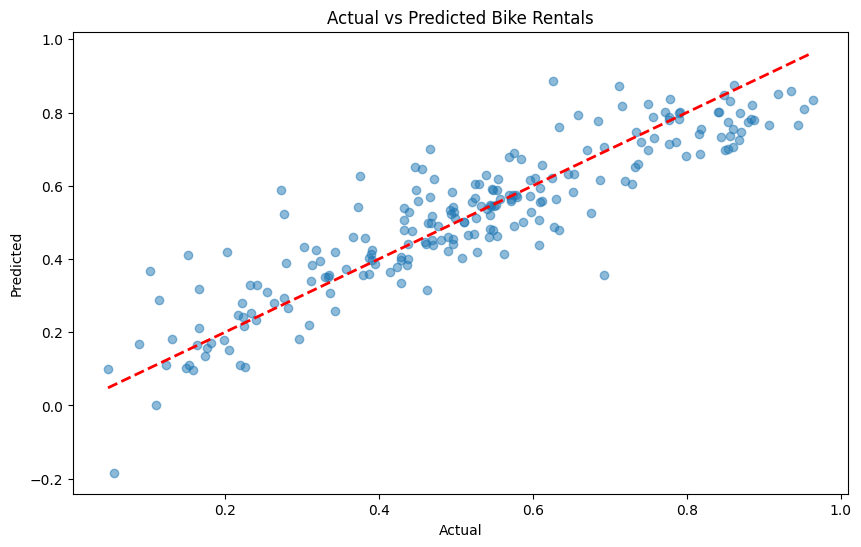

In [108]:
# 1. Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Bike Rentals")
plt.show()